Mariana Brinkley - Homework 10 

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Step 1 - Climate Analysis and Exploration

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

In [10]:
#Measurement table
df = pd.read_sql('select * from Measurement', engine)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
#Station table 
df = pd.read_sql('select * from Station', engine)
df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = max_date[0]
year_ago=dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days= 365)
data=session.query( Measurement.date, Measurement.prcp).filter(Measurement.date>= year_ago).all()
data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [30]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
#query2=session.query(Measurement.prcp, Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
#prcp_df = pd.DataFrame(query, columns=['date', 'precipitation'])
prcp_df = pd.DataFrame(data, columns=['date', 'precipitation'])
prcp_df['date'] = pd.to_datetime(prcp_df['date'], format='%Y-%m-%d')
prcp_df.set_index('date', inplace=True)
prcp_df = prcp_df.sort_values(by='date', ascending=True)
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

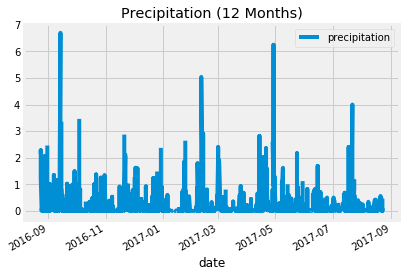

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation (12 Months)")
plt.legend(loc='upper right')
plt.show()

![precipitation](Images/precipitation.png)

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

## Station Analysis

In [43]:
# Design a query to show how many stations are available in this dataset?
station_query = session.query(Measurement.station).distinct().count()
station_query

9

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
active_stations
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = active_stations[0][0]    
most_active

temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
    func.avg(Measurement.tobs)).filter(Measurement.station == most_active)
print(f"Most Active Station Temperatures")
print(f"Low: {temp[0][0]} High: {temp[0][1]} Average: {round(temp[0][2], 1)}")

Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


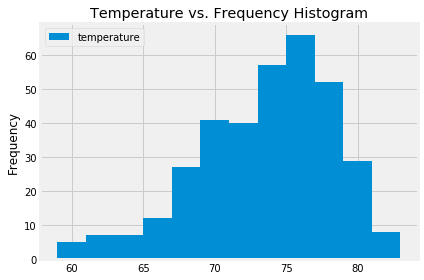

In [80]:
# Choose the station with the highest number of temperature observations.
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query( Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == most_temps_station).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['temperature'])
temperature_observations.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout()

plt.show()

![precipitation](Images/station-histogram.png)

## Step 2 - Climate App

In [86]:
# Design a Flask API based on the queries that you have just developed
# Use Flask to create your routes per instructions
from flask import Flask, jsonify

app = Flask(__name__)

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Avalable Routes:"
        f"/api/v1.0/precipitation"
        f"-the dates and precipitation observations from the last year"
        f"/api/v1.0/stations"
        f"- list of stations from the dataset"
        f"//api/v1.0/tobs"
        f"/api/v1.0/calc_temps/<start>"
        f"- list of `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date"
        f"/api/v1.0/calc_temps/<start>/<end>"
        f"- the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive"
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of dates and precipitation observations"""
    # Query all dates and precipitation observations last year from the measurement table
    
    prcp_results = data=session.query( Measurement.date, Measurement.prcp).filter(Measurement.date>= year_ago).all()

    return jsonify(precipitation)


@app.route("/api/v1.0/stations")
def stations():
   
    # Query all stations from the station table
    station_results = session.query(Measurement.station).distinct().count()


@app.route("/api/v1.0/tobs")
def tobs():
    tobs_results = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
   
    return jsonify(tobs_list)

@app.route("/api/v1.0/calc_temps/<start>")

def calc_temps(start='start_date'):
    start_date = datetime.strptime('2016-08-01', '%Y-%m-%d').date()
    start_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
    func.avg(Measurement.tobs)).filter(Measurement.station == most_active)
    

    return jsonify(start_tobs)
@app.route("/api/v1.0/calc_temps/<start>/<end>")

def calc_temps_2(start='start_date', end='end_date'):      
    start_date = datetime.strptime('2016-08-01', '%Y-%m-%d').date()
    end_date = datetime.strptime('2017-08-01', '%Y-%m-%d').date()

    start_end_results=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by
    (func.count(Measurement.station).desc()).first()
   
    
    return jsonify(start_end_results)

    app.run(debug=True)
